In [202]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import pickle

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import time
import matplotlib as mpl
start = time.time()

In [203]:
data = pd.read_csv('Features_gap_pubchemqc.csv')
print (data.columns)
features_names0 = data.columns[0:18]
print (features_names0)
# Check the columns names
X_train, X_test, y_train, y_test = train_test_split(
    data[features_names0].values,
    data['gap'].values
)

# see train shape, overal 133K samples, 
# all samples, train =105K , test =33K 
# with subsampling, train= 25.1K, test = 8.4K
print ("Features train array shape: ",X_train.shape)
print ("Features test array shape: ",X_test.shape)
print ("Heat_capacity train shape: ",y_train.shape)
print ("Heat_capacity test shape:",y_test.shape)

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'Logp', 'TPSA', 'QED', 'gap'],
      dtype='object')
Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles'],
      dtype='object')
Features train array shape:  (2041, 18)
Features test 

In [204]:
# kfolds = KFold(shuffle = True, random_state = 42)
scorer = make_scorer(mean_squared_error, greater_is_better = False)

xgb = XGBRegressor(objective = 'reg:squarederror')
param_grid = {'max_depth': range(3,5),
              'learning_rate': [1e-4, 0.001, 0.01, 0.1, 1],
              'n_estimators': range(500, 501),
              'subsample': [0.7]}
xgb = RandomizedSearchCV(xgb, param_grid, n_iter = 100,
                         cv = 3, scoring = scorer, refit = True,
                         n_jobs = 2, verbose = 2)
xgb.fit(X_train, y_train)
best_params = xgb.best_params_

xgb = XGBRegressor(objective = 'reg:squarederror',
                   n_jobs = 10)
xgb.set_params(**best_params)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)
plt.savefig("xgboost.png")
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def mAPE(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true))

print ("r2_score: ",r2_score(y_test, y_pred))
print ("Mean of Cv_test: ",np.mean(y_test))
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print ("Mean Squared Error train: ", mean_squared_error(y_train, y_pred_train))
print ("test r-square: ", r2_score ( y_test, y_pred))
print ("train r-square: ", r2_score (y_train, y_pred_train))
print ("MSE/Mean_Cv_test: ", mean_squared_error(y_test, y_pred)/np.mean(y_test))
print ("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print ("Mean_absolute_error/Mean_Cv_test: ",mean_absolute_error(y_test, y_pred)/np.mean(y_test)) 
print ("MeanAbsolutePercentage error (MAPE): ",MAPE(y_test, y_pred))
print ("MedianAbsolutePercentage error (MdAPE): ",mAPE(y_test, y_pred))
end = time.time()
print ("time: ",end-start)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=500, subsample=0.7; to

<Figure size 640x480 with 0 Axes>

MAE test:  0.6975132097158155
MAE train:  0.47040475877654303


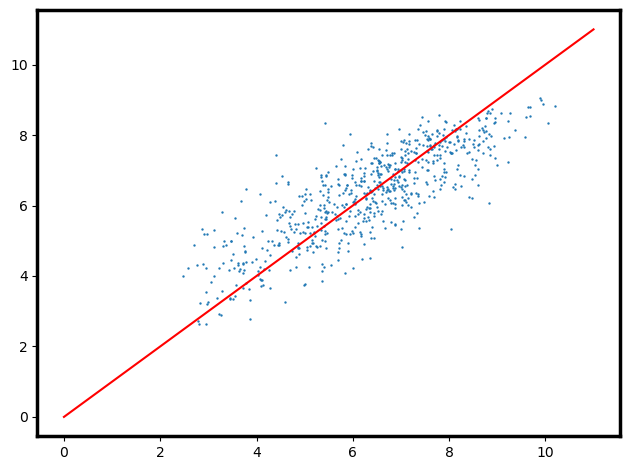

In [205]:
plt.scatter(y_test, y_pred, s=0.5)
plt.plot ([0, 11], [0, 11], color='red')
print ('MAE test: ', mean_absolute_error(y_test, y_pred))
print ('MAE train: ', mean_absolute_error(y_train, y_pred_train))

In [207]:
xgbr_final = XGBRegressor(max_depth=9, n_estimators=201, 
                                       gamma=0.0001, learning_rate=0.195, 
                                       subsample=0.7,  min_child_weight=15, 
                                       n_jobs=-1, random_state=9)
xgbr_final.fit(X_train, y_train);
predictions = xgbr_final.predict(X_test)
r_squared_test = r2_score(y_test, predictions)
print (r_squared_test)
train_predictions = xgbr_final.predict(X_train)
r_squared = r2_score(y_train, train_predictions)
print (r_squared)
importance = list(xgbr_final.feature_importances_)
print (importance)

0.36304197281629824
0.44338015204198766
[0.0185933, 0.03451921, 0.049580388, 0.01947372, 0.01157485, 0.035446867, 0.09995728, 0.038139727, 0.0, 0.21497329, 0.29560548, 0.07958835, 0.010246796, 0.061052263, 0.0, 0.0, 0.019994348, 0.011254057]


In [201]:
xgbr_final.feature_importances_

array([0.00496631, 0.01676753, 0.01160507, 0.00643031, 0.00590091,
       0.03574289, 0.01040895, 0.01770308, 0.5207371 , 0.04615569,
       0.04885805, 0.15823504, 0.01815526, 0.00524067, 0.00406953,
       0.0031143 , 0.07561278, 0.01029664], dtype=float32)

In [185]:
features_names0

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles'],
      dtype='object')

In [186]:
features_names = ['Mol.Wt.', 'HeavyAtomCount', 'HeavyAtomMol.Wt.', 'Num.H-Acceptors', 
             'Num.H-Donors', 'Num.Het.atoms', 'Num.Rot.Bonds', 'NumVal.Elec.',  
             'Num.Arom.Rings', 'Num.Sat.Rings', 'Num.Aliph.Rings', 'Num.Rad.Elect.', 
             'Num.Aliph.Carbocyc.', 'Num.Aliph.Het.cyc.', 'Num.Arom.Carbocyc.', 
             'Num.Arom.Het.cyc.', 'Num.Sat.Carbocyc.', 'Num.Sat.Het.cyc.']

In [187]:
importance_pd = pd.DataFrame({})
importance_pd['features'] = features_names
importance_pd['importance_values'] = np.round(importance, 4)

In [200]:
importance_pd.sort_values(by='importance_values', ascending=False)

,features,importance_values
8,Num.Arom.Rings,0.5207
11,Num.Rad.Elect.,0.1582
16,Num.Sat.Carbocyc.,0.0756
10,Num.Aliph.Rings,0.0489
9,Num.Sat.Rings,0.0462
5,Num.Het.atoms,0.0357
12,Num.Aliph.Carbocyc.,0.0182
7,NumVal.Elec.,0.0177
1,HeavyAtomCount,0.0168
2,HeavyAtomMol.Wt.,0.0116


<Axes: >

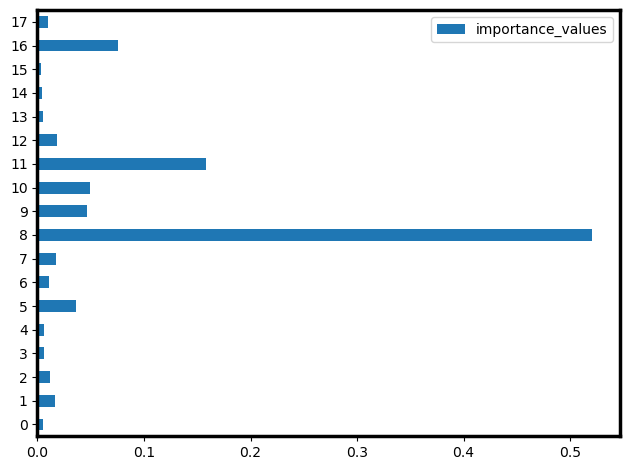

In [190]:
importance_pd.plot(kind='barh')

In [191]:
XX = pd.Series(np.round (importance, 4), index=features_names)
XX

Mol.Wt.                0.0050
HeavyAtomCount         0.0168
HeavyAtomMol.Wt.       0.0116
Num.H-Acceptors        0.0064
Num.H-Donors           0.0059
Num.Het.atoms          0.0357
Num.Rot.Bonds          0.0104
NumVal.Elec.           0.0177
Num.Arom.Rings         0.5207
Num.Sat.Rings          0.0462
Num.Aliph.Rings        0.0489
Num.Rad.Elect.         0.1582
Num.Aliph.Carbocyc.    0.0182
Num.Aliph.Het.cyc.     0.0052
Num.Arom.Carbocyc.     0.0041
Num.Arom.Het.cyc.      0.0031
Num.Sat.Carbocyc.      0.0756
Num.Sat.Het.cyc.       0.0103
dtype: float32

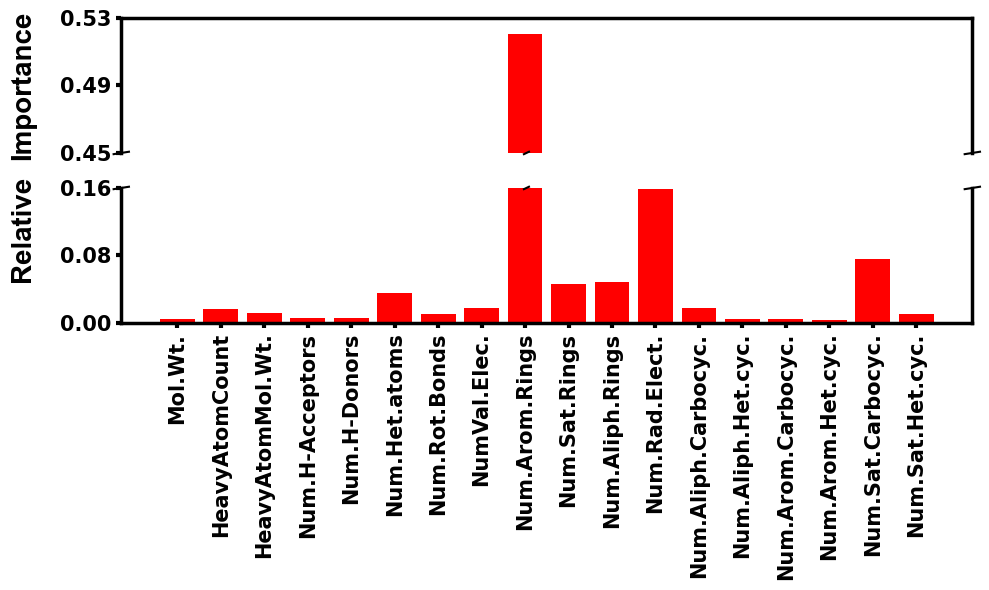

In [199]:
XX = pd.Series(np.round (importance, 4), index=features_names)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10,6))

mpl.rcParams['axes.linewidth'] = 2.5
XX2 = np.around(XX.values, decimals=5)

ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

plt.rcParams["figure.autolayout"] = True
bs = 0.16
ts = 0.45
ax2.set_ylim(0,bs)
ax1.set_ylim(ts, 0.53)

bars1 = ax1.bar(XX.index, XX2, color='red')
plt.sca(ax1)
plt.yticks(rotation=0, fontsize=15, fontweight='bold',)
plt.yticks(np.linspace(ts, 0.53, 3))
ax1.xaxis.set_tick_params(width=3)
ax1.yaxis.set_tick_params(width=3)
#plt.legend(["QM9"], rotation=90,fontsize=15)

bars2 = ax2.bar(XX.index, XX2, color='red')
plt.sca(ax2)
plt.xticks(rotation=90, fontweight='bold', fontsize=15)
plt.yticks(rotation=0, fontweight='bold', fontsize=15)

plt.yticks(np.linspace(0, bs, 3))
ax2.xaxis.set_tick_params(width=3)
ax2.yaxis.set_tick_params(width=3)
ax1.set_ylabel('Importance', fontweight='bold', fontsize=20, fontname='Arial')
ax2.set_ylabel('Relative', fontweight='bold', fontsize=20, fontname='Arial')
ax1.yaxis.set_label_coords(-0.1, 0.5)
ax2.yaxis.set_label_coords(-0.1, 0.7)
"""
for tick in ax2.get_xticklabels():
    tick.set_rotation(-45, fontsize=15)
"""
d = .009
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-3*d, posx+10*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx-3*d, posx+10*d), (- d, + d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())

plt.tight_layout()
plt.savefig('last_features.jpeg', bbox_inches='tight', dpi=500)